# imports

In [1]:
from trotter.hamsimtrotter import AlgorithmHamSimTrotter
from qDrift.hamsimqDrift import AlgorithmHamSimqDrift
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator
from pytket.circuit import Circuit,Qubit,fresh_symbol

from utils.func import calculate_error

from tqdm import tqdm
import numpy as np

# system parameters

In [2]:
def gen_sys_param(n=3):
    global t_max
    global precision
    global initial_state_circ
    global t
    global hamiltonian
    global hamiltonian_drift
    global coeff
    global measurements
    global hamiltonian_test
    global h_test
    global coeff_test
    global Heisenberg
    global H3

    t_max=n
    precision = 10**(-4)
    initial_state_circ = Circuit(n)
    initial_state_circ.X(0)
    initial_state_circ.X(2)
    t = fresh_symbol("t")

    hamiltonian = QubitPauliOperator(
        {
            QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1*t,
            QubitPauliString(
                [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
                [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X],
            ): 0.4*t,
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): 0.2*t,
        }
    )

    H3 = QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(0)], [Pauli.X, Pauli.X]): t,
            
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t
        })


    Heisenberg = [
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(0)], [Pauli.X, Pauli.X]): t,
            
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(0)], [Pauli.X, Pauli.X]): t,
            
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(0)], [Pauli.X, Pauli.X]): t,
            
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(6), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(6), Qubit(0)], [Pauli.X, Pauli.X]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(6), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t,
            QubitPauliString([Qubit(6)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(7), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(7), Qubit(0)], [Pauli.X, Pauli.X]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(7), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t,
            QubitPauliString([Qubit(6)],[Pauli.Z]): t,
            QubitPauliString([Qubit(7)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(8), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(8), Qubit(0)], [Pauli.X, Pauli.X]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(8), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t,
            QubitPauliString([Qubit(6)],[Pauli.Z]): t,
            QubitPauliString([Qubit(7)],[Pauli.Z]): t,
            QubitPauliString([Qubit(8)],[Pauli.Z]): t
        }) ,
        QubitPauliOperator(
        {
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(8), Qubit(9)], [Pauli.Z, Pauli.Z]): t,
            QubitPauliString([Qubit(9), Qubit(0)], [Pauli.Z, Pauli.Z]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(8), Qubit(9)], [Pauli.X, Pauli.X]): t,
            QubitPauliString([Qubit(9), Qubit(0)], [Pauli.X, Pauli.X]): t,

            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(1), Qubit(2)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(2), Qubit(3)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(3), Qubit(4)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(4), Qubit(5)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(5), Qubit(6)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(6), Qubit(7)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(7), Qubit(8)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(8), Qubit(9)], [Pauli.Y, Pauli.Y]): t,
            QubitPauliString([Qubit(9), Qubit(0)], [Pauli.Y, Pauli.Y]): t,

            QubitPauliString([Qubit(0)],[Pauli.Z]): t,
            QubitPauliString([Qubit(1)],[Pauli.Z]): t,
            QubitPauliString([Qubit(2)],[Pauli.Z]): t,
            QubitPauliString([Qubit(3)],[Pauli.Z]): t,
            QubitPauliString([Qubit(4)],[Pauli.Z]): t,
            QubitPauliString([Qubit(5)],[Pauli.Z]): t,
            QubitPauliString([Qubit(6)],[Pauli.Z]): t,
            QubitPauliString([Qubit(7)],[Pauli.Z]): t,
            QubitPauliString([Qubit(8)],[Pauli.Z]): t,
            QubitPauliString([Qubit(9)],[Pauli.Z]): t 
        }) 
    ]

    hamiltonian_test = QubitPauliOperator(
        {
            # QubitPauliString(
            #     [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
            #     [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X],
            # ): 0.4*t,
            QubitPauliString([Qubit(0), Qubit(1)], [Pauli.Z, Pauli.X]): 0.2*t
        }
    )

    hamiltonian_drift = ['ZIII','YZXX','XXII']
    h_test = ['ZXII']
    coeff_test = [0.2]
    coeff = [0.1,0.4,0.2]

    measurements = [QubitPauliOperator({QubitPauliString([Qubit(i)], [Pauli.Z]): 1}) for i in range(initial_state_circ.n_qubits)]

# Trotter cheat

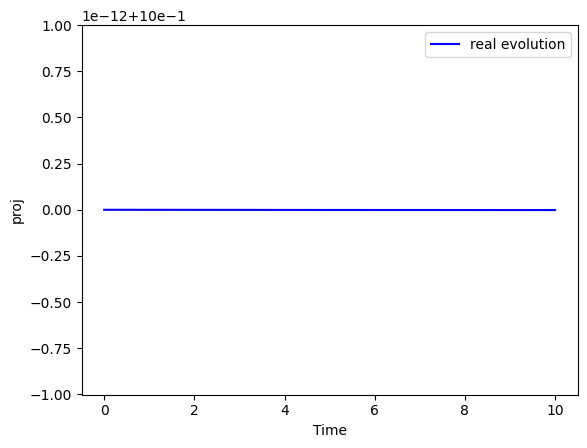

In [5]:
gen_sys_param(7)
n_trotter_steps = 3
trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[3],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_cheat.execute(labels='real evolution')

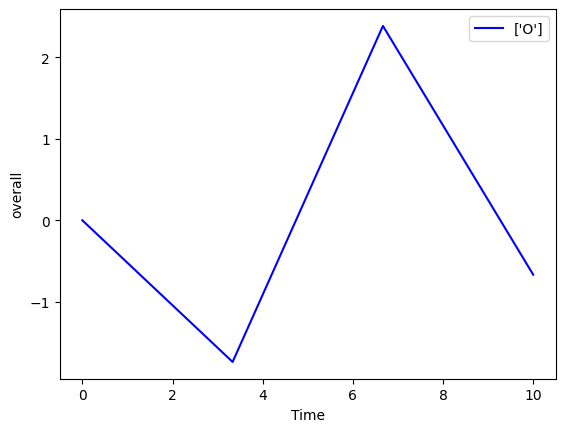

In [6]:
gen_sys_param()
trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_cheat.execute(exps='overall',labels=['O'])

# Lie-Trotter

/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


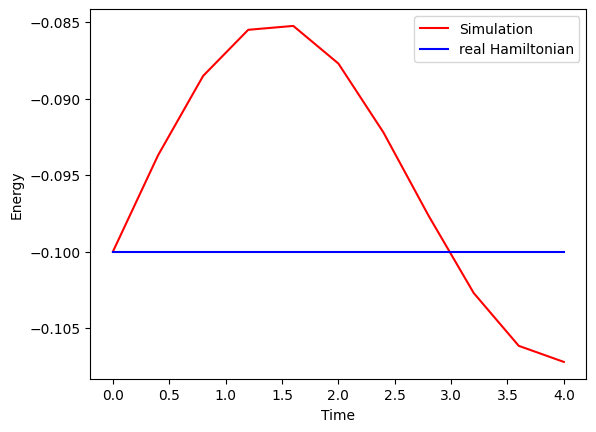

In [7]:
n_trotter_steps = 10
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels='Simulation',cheat=False,color='red')

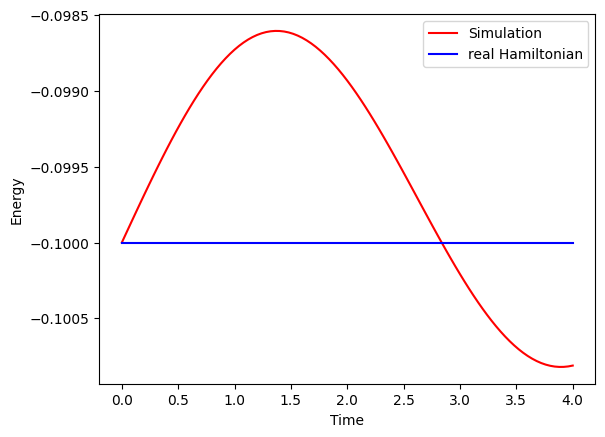

In [8]:
n_trotter_steps = 100
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels='Simulation',cheat=False,color='red')

/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


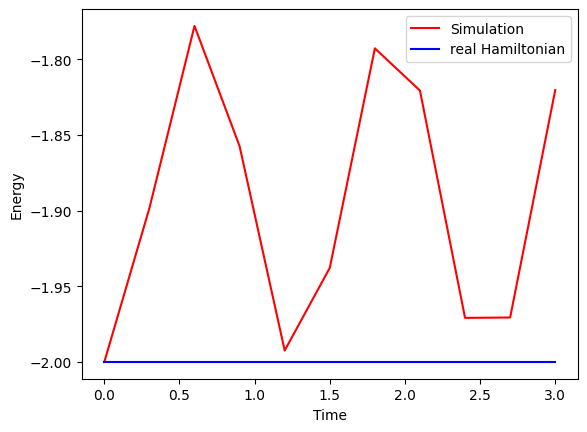

In [3]:
n_trotter_steps = 10
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels='Simulation',cheat=False,color='red')

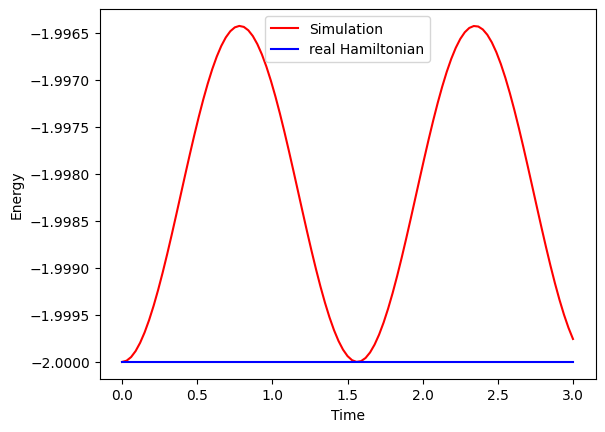

In [4]:
n_trotter_steps = 100
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels='Simulation',cheat=False,color='red')

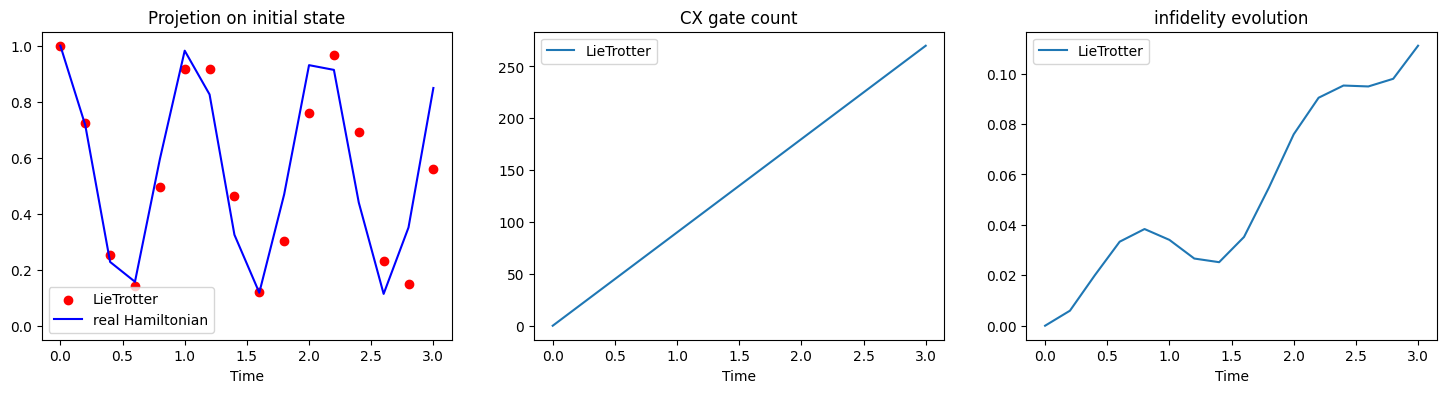

In [3]:
n_trotter_steps = 15
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(labels=['LieTrotter','LieTrotter','LieTrotter'], color='red', cheat=False)

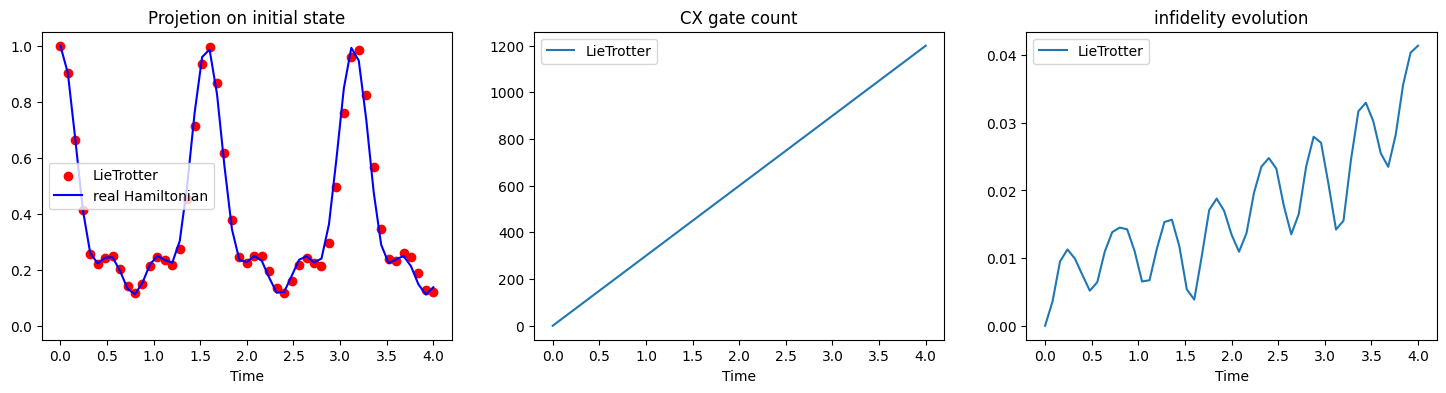

In [7]:
n_trotter_steps = 50
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(labels=['LieTrotter','LieTrotter','LieTrotter'], color='red', cheat=False)

In [3]:
from qiskit.quantum_info import Choi, diamond_norm
def diamondNorm(Uexact: np.ndarray, Uapprox: np.ndarray) -> float:
    """
    Compute the diamond norm between the circuit and exact unitaries.

        D(e,u) = ||C(Uexact) - C(Uapprox)||

    Where C(*) indicates the Choi representation of the quantum channel, and
    ||*|| indicates the diamond norm.
    """
    # Generate target Choi
    target = Choi(Uexact)

    # Generate the input quantum channel
    experiment = Choi(Uapprox)

    return round(diamond_norm(target - experiment), 6)

In [6]:
from scipy.stats import unitary_group
a = unitary_group.rvs(3)
b = a
diamondNorm(a,b)

0.0

In [9]:
n_trotter_steps = 50
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.lie_trotter()
U_sim, U = trotter_time_evolution2.execute(labels=['LieTrotter','LieTrotter','LieTrotter'], color='red', cheat=False, plot=False)
# print(np.around(U_sim,2)- np.around(U,2))

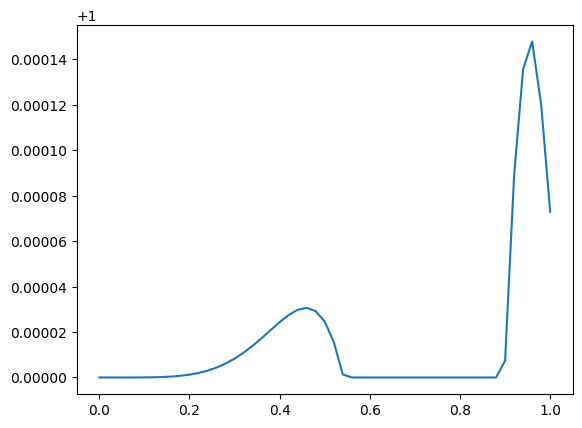

In [10]:
error = []
for i in range(len(U)):
    error.append(calculate_error(U_sim[i], U[i]))
import matplotlib.pyplot as plt
plt.plot(trotter_time_evolution2._time_space, error)

In [3]:
gen_sys_param()
error = 1
n_trotter_steps = 3
while error > precision:
    U_sims = []
    for i in tqdm(range(3)):
        gen_sys_param()
        trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
        trotter_time_evolution.lie_trotter()
        U_sim, U = trotter_time_evolution.execute(color='red', cheat=False, plot=False)
        U_sims.append(U_sim)
        # print(U)
        # print(sum(U_sims)/len(U_sims))
    error = calculate_error(U_sims, U)
    print('step:',n_trotter_steps,'error:',error)
    n_trotter_steps *= 10
# gen_sys_param()
# trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
# trotter_time_evolution.lie_trotter()
# U_sim, U = trotter_time_evolution.execute(labels=['LieTrotter','LieTrotter','LieTrotter'], color='red', cheat=False, plot=False)
# error = calculate_error([U_sim], U)
# print(error)

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 20.57it/s]


step: 3 error: 1.8185948536513687


100%|██████████| 3/3 [00:00<00:00, 12.15it/s]


step: 30 error: 0.3989764347059212


100%|██████████| 3/3 [00:01<00:00,  2.40it/s]


step: 300 error: 0.044237392246953736


100%|██████████| 3/3 [00:10<00:00,  3.62s/it]


step: 3000 error: 0.00446717201982356


100%|██████████| 3/3 [01:49<00:00, 36.50s/it]


step: 30000 error: 0.00044715971696989825


100%|██████████| 3/3 [17:34<00:00, 351.49s/it]


step: 300000 error: 4.4720427103944766e-05


  0%|          | 0/3 [00:00<?, ?it/s]

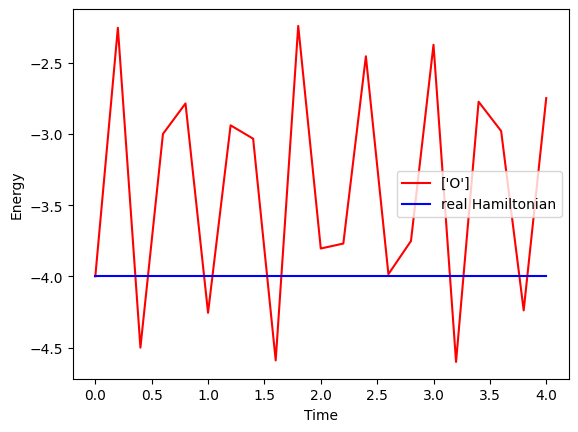

In [4]:
n_trotter_steps = 20
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(exps='Energy',labels=['O'],cheat=False,color='red')

# second order trotter

In [5]:
gen_sys_param()
error = 1
n_trotter_steps = 3
while error > precision:
    U_sims = []
    for i in tqdm(range(3)):
        gen_sys_param()
        trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
        trotter_time_evolution.second_order_suzuki_trotter()
        U_sim, U = trotter_time_evolution.execute(color='yellow', cheat=False, plot=False)
        U_sims.append(U_sim)
    error = calculate_error(U_sims, U)
    print('step:',n_trotter_steps,'error:',error)
    if error < precision:
        print('Congratulations!')
    n_trotter_steps *= 10

100%|██████████| 3/3 [00:00<00:00, 16.71it/s]


step: 3 error: 1.9438758027266414


100%|██████████| 3/3 [00:00<00:00,  5.61it/s]


step: 30 error: 0.7941019270079374


100%|██████████| 3/3 [00:03<00:00,  1.16s/it]


step: 300 error: 0.07572357932731878


100%|██████████| 3/3 [00:33<00:00, 11.13s/it]


step: 3000 error: 0.0076322294986066385


100%|██████████| 3/3 [05:15<00:00, 105.20s/it]


step: 30000 error: 0.0007637858413663586


100%|██████████| 3/3 [53:59<00:00, 1079.96s/it]

step: 300000 error: 7.638392631675566e-05


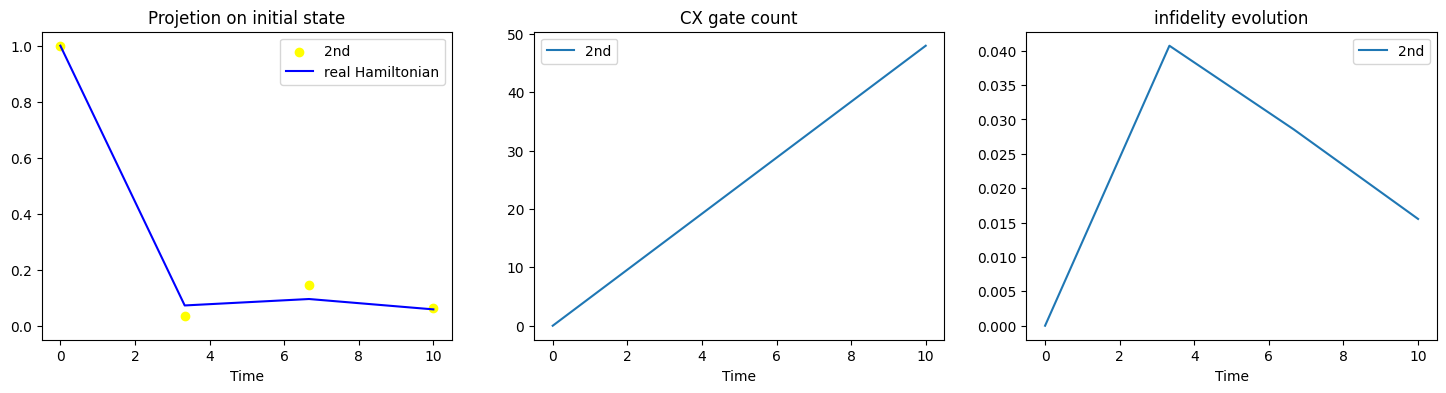

In [9]:
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(labels=['2nd','2nd','2nd'], cheat=False, color='yellow')

/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


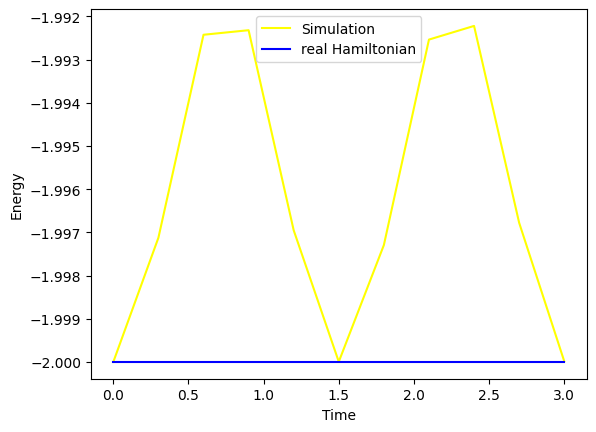

In [3]:
n_trotter_steps = 10
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.second_order_suzuki_trotter()
trotter_time_evolution.execute(exps='Energy',labels='Simulation',cheat=False,color='yellow')

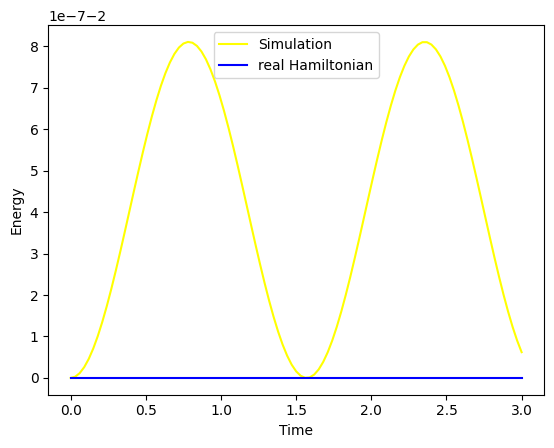

In [4]:
n_trotter_steps = 100
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,H3,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.second_order_suzuki_trotter()
trotter_time_evolution.execute(exps='Energy',labels='Simulation',cheat=False,color='yellow')

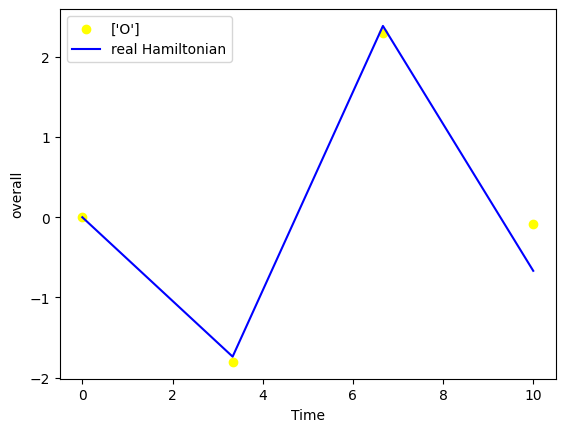

In [10]:
gen_sys_param()
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(exps='overall',labels=['O'],cheat=False,color='yellow')

# higher order trotter

In [8]:
gen_sys_param()
error = 1
n_trotter_steps = 3
while error > precision:
    U_sims = []
    for i in tqdm(range(3)):
        gen_sys_param()
        trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[1],measurements,t_max,n_trotter_steps,t)
        trotter_time_evolution.suzuki_trotter(6)
        U_sim, U = trotter_time_evolution.execute(color='green', cheat=False, plot=False)
        U_sims.append(U_sim)
    error = calculate_error(U_sims, U)
    print('step:',n_trotter_steps,'error:',error)
    if error < precision:
        print('Congratulations!')
    n_trotter_steps *= 10

100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


step: 3 error: 1.6079318384599206


100%|██████████| 3/3 [00:10<00:00,  3.62s/it]


step: 30 error: 0.8408825367873318


100%|██████████| 3/3 [01:47<00:00, 35.81s/it]


step: 300 error: 0.09213244000016242


100%|██████████| 3/3 [17:33<00:00, 351.08s/it]


step: 3000 error: 0.009263966641093023


  0%|          | 0/3 [00:00<?, ?it/s]

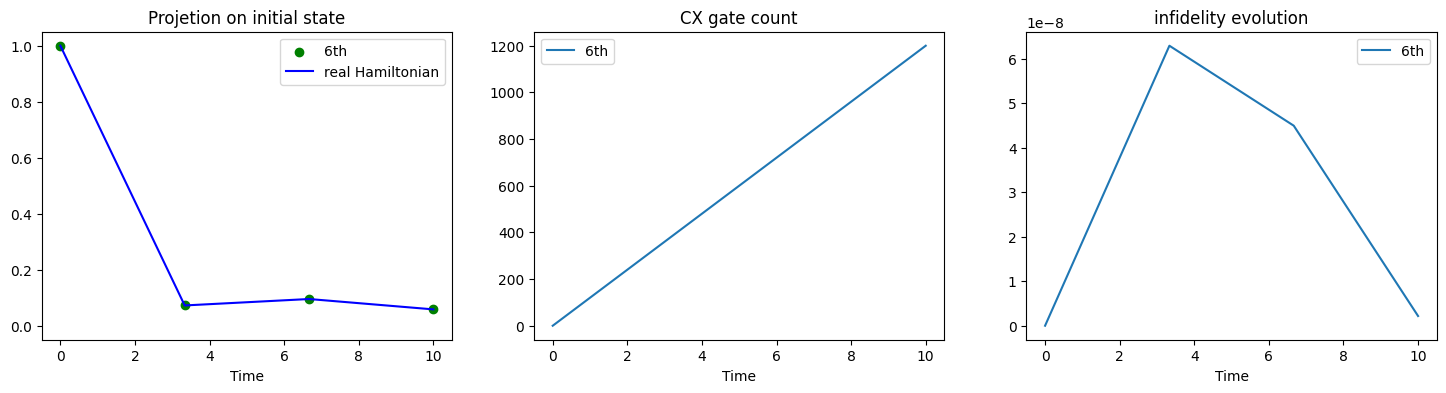

In [11]:
gen_sys_param()
trotter_time_evolution_high = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
# from pytket.extensions.qiskit import tk_to_qiskit
# print(tk_to_qiskit(trotter_time_evolution_high.suzuki_trotter_cir_gen(order=6)))
trotter_time_evolution_high.suzuki_trotter(6)
trotter_time_evolution_high.execute(labels=['6th','6th','6th'], cheat=False, color='green')

# Compare

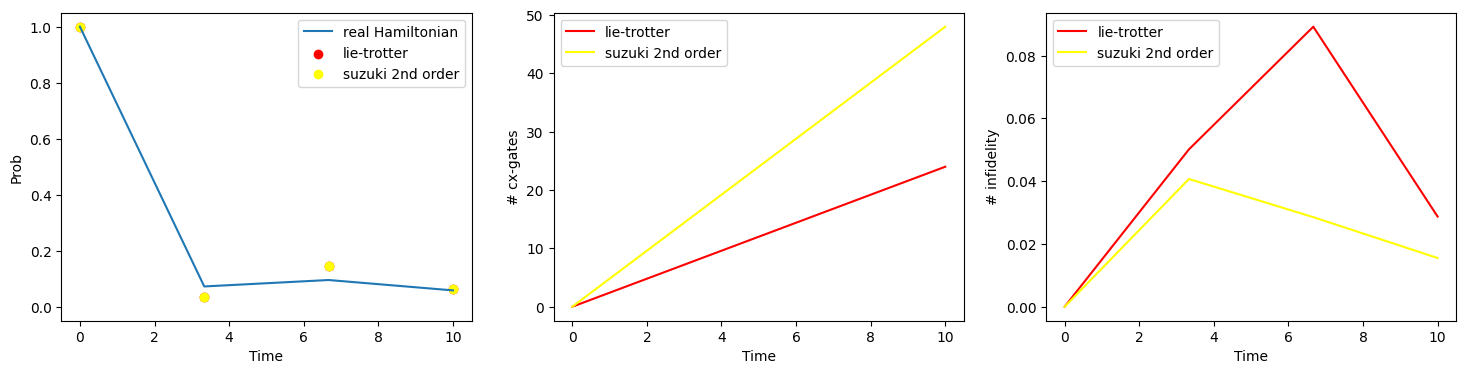

In [12]:
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
expsl, gatesl, infidelitiesl, _ = trotter_time_evolution.lie_trotter(True)
gen_sys_param()
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
expss, gatess, infidelitiess, _ = trotter_time_evolution.second_order_suzuki_trotter(True)

trotter_time_evolution.compare([expsl,expss], [gatesl,gatess], [infidelitiesl, infidelitiess], ['lie-trotter', 'suzuki 2nd order'], ['red','yellow'])

# TODO set gate comparison on the scale of same infidelity threshold value

# qDrift

['YZXX', 'YZXX', 'XXII'] [1.4854461355243564, 1.4854461355243564, 1.4854461355243564] [1 1 2]
['YZXX', 'ZIII', 'YZXX'] [1.4854461355243564, 1.4854461355243564, 1.4854461355243564] [1 0 1]
['YZXX', 'YZXX', 'YZXX'] [1.4854461355243564, 1.4854461355243564, 1.4854461355243564] [1 1 1]


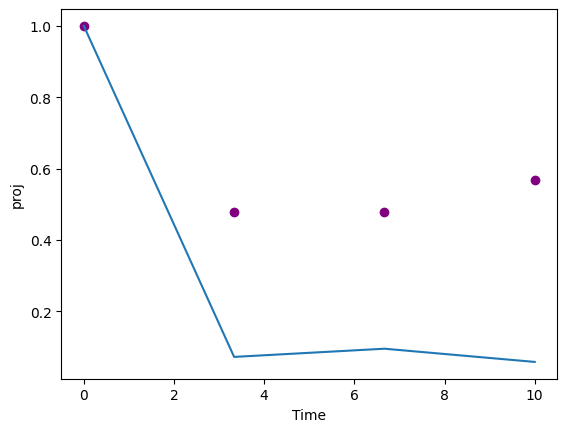

In [13]:
gen_sys_param()
drift_time_evolution = AlgorithmHamSimqDrift(initial_state_circ,hamiltonian_drift,coeff,measurements,t_max,n_qdrift_steps,precision)
drift_time_evolution.Drift_exp()
trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_cheat._trotter_step_cheat(exps='proj')
drift_time_evolution.execute(list(trotter_time_evolution_cheat._real_measurement.values()), color='purple')

# LCU

In [ ]:
gen_sys_param()
error = 1
n_trotter_steps = 3
while error > precision:
    U_sims = []
    for i in tqdm(range(3)):
        gen_sys_param()
        trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,Heisenberg[0],measurements,t_max,n_trotter_steps,t)
        trotter_time_evolution.LCU(2)
        U_sim, U = trotter_time_evolution.execute(color='yellow', cheat=False, plot=False)
        U_sims.append(U_sim)
    error = calculate_error(U_sims, U)
    print('step:',n_trotter_steps,'error:',error)
    if error < precision:
        print('Congratulations!')
    n_trotter_steps *= 10

100%|██████████| 3/3 [00:09<00:00,  3.04s/it]


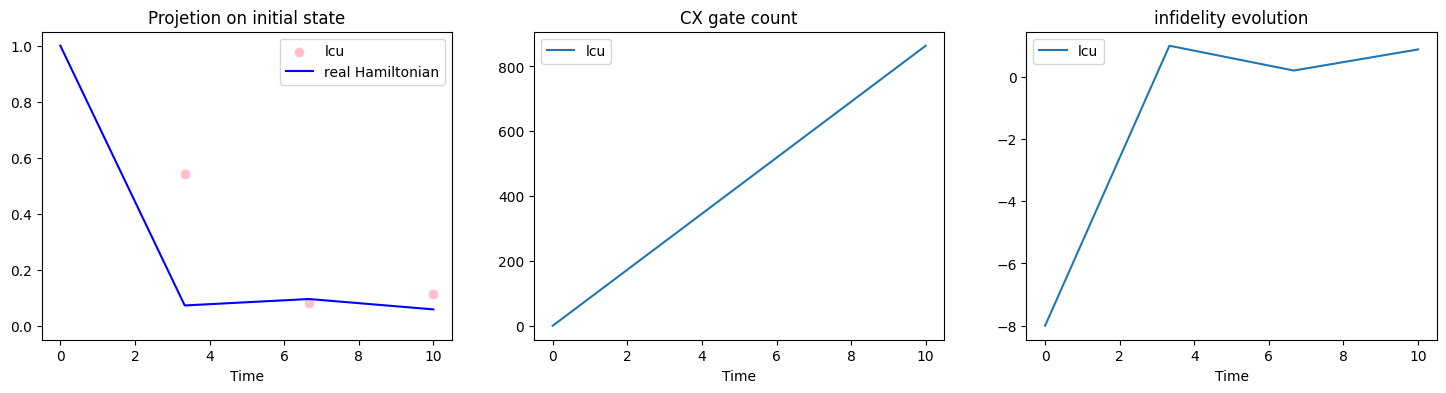

In [3]:
gen_sys_param()
lcu_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_lcu_steps,t)
lcu_time_evolution.LCU(2)
lcu_time_evolution.execute(labels=['lcu','lcu','lcu'], cheat=False, color='pink')

# Random Perm

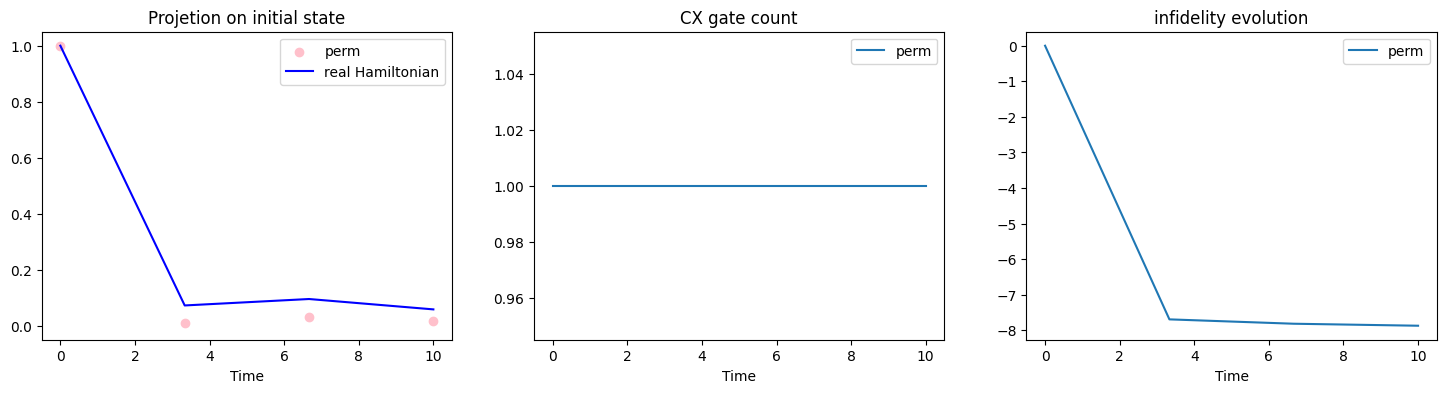

In [3]:
gen_sys_param()
perm_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_lcu_steps,t)
perm_time_evolution.random_perm(2)
perm_time_evolution.execute(labels=['perm','perm','perm'], cheat=False, color='pink')